# Setup

### Image of compressing a TIFF as a metaphor

In [4]:
import os
import numpy as np
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
from PIL import Image

def load_images(folder_path):
    images = []
    labels = []
    for filename in sorted(os.listdir(folder_path)):
        if filename.endswith('.png'):
            img = Image.open(os.path.join(folder_path, filename)).convert('L')  # Convert to grayscale
            img_array = np.array(img).flatten()  # Flatten the image
            images.append(img_array)
            label = int(filename.split("__")[0].split("obj")[1])  # Extract object number from filename
            labels.append(label)
    return np.array(images), np.array(labels)

# Load the images

In [5]:
folder_path = './coil-20/coil-20-proc'
images, labels = load_images(folder_path)
print(len(images), len(labels))

1440 1440


# Apply t-SNE

In [6]:
tsne = TSNE(n_components=2, perplexity=4, random_state=0)
X_2d = tsne.fit_transform(images)

# Plot the result

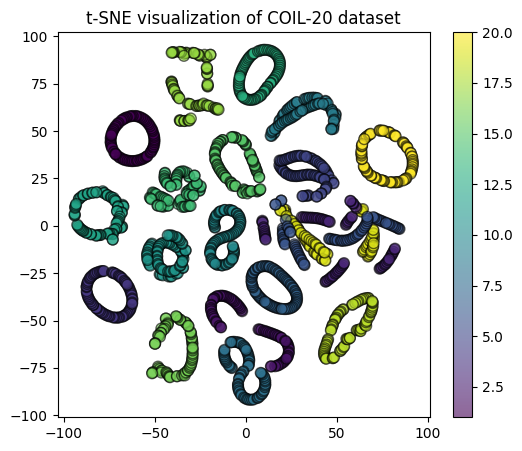

In [7]:
plt.figure(figsize=(6, 5))
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap='viridis', edgecolor='k', s=60, alpha=0.6)
plt.colorbar(scatter)
plt.title('t-SNE visualization of COIL-20 dataset')
plt.show()